# Movies 3

## Introduction

Une base de données (hébergée dans le cloud AWS) contenant un certain nombre de données cinématographiques vous est fournie pour exploration et mise en pratique des langages SQL et Python.  
Les données de connexion (user, host) sont indiquées dans le brief, le mot de passe nécessaire est précisé en session par le formateur.  


## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quelles types de renseignement peut-on tirer de cette base de données ?   

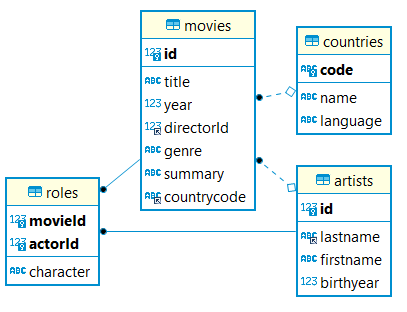

In [1]:
from IPython.display import Image
Image("C:/Users/utilisateur/simplon/dev-data/Briefs/19-Movies3/Movies3/IMGS/Screenshot_1.png")

En observant le diagramme entité-relation, on peut distinguer quatre tables composant cette base de données. Bien que l'on aurait pu conclure à une base de données SQL par l'utilisation de DBeaver (Un gestionnaire de données relationnelles), on peut tirer la même conclusion en observant sur ce diagramme les associations entre les tables symbolisées par des traits reliant deux tables entre elles.

On comprend alors que nous ne sommes pas dans une base NoSQL avec des paires clé-valeures et des clés universelles et artificielles comme identifiant de ces paires mais dans un système relationnel entre les tables rendu possible grâce à des clés primaires et étrangères.

la table movies à ses clés primaires sur un attribut "id". Elle est reliée à la table roles via une clé étrangère "movieId" dans roles. La clé primaire de roles est composée de deux attributs, "movieId" et "actorId". La table roles est reliée à la table artists via une autre clé étrangère "actorId", sur l'attribut "id", clé primaire de artists. Cette clé primaire est aussi la référence de "directorId", clé étrangère de la table movies. Enfin une seconde clé étrangère se trouve sur la table movies, il s'agit de "countrycode", référence à l'attribut "code", clé primaire de la table countries.

---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [57]:
import os
import pandas as pd

In [58]:
from sqlalchemy import create_engine
import pymysql

In [59]:
# paramètres de connexion à la base de données movies (MySQL sous AWS RDS)
user = os.environ.get('movies3_user')
password = os.environ.get('movies3_psw') 
host = os.environ.get('movies3_host')  
port = 3306
dbname = 'movies'  

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{dbname}")

### Exemples

#### Tables de base

In [60]:
movies = pd.read_sql_query("SELECT * FROM movies LIMIT 10", engine)
movies.head()

,id,title,year,directorId,genre,summary,countrycode
0,11,La Guerre des étoiles,1977,1,Aventure,"Il y a bien longtemps, dans une galaxie très l...",US
1,24,Kill Bill : Volume 1,2003,138,Action,Au cours d'une cérémonie de mariage en plein d...,US
2,28,Apocalypse Now,1979,1776,Drame,L'état-major américain confie au jeune capitai...,US
3,33,Impitoyable,1992,190,Western,"Après avoir été un impitoyable tueur, toujours...",US
4,38,Eternal Sunshine of the Spotless Mind,2004,201,Science-Fiction,Joël et Clémentine ne voient plus que les mauv...,US


In [5]:
artists = pd.read_sql_query("SELECT * FROM artists LIMIT 10", engine)
artists.head()

,id,lastname,firstname,birthyear
0,1,Lucas,George,1944
1,2,Hamill,Mark,1951
2,3,Ford,Harrison,1942
3,4,Fisher,Carrie,1956
4,5,Cushing,Peter,1913


In [6]:
roles = pd.read_sql_query("SELECT * FROM roles LIMIT 10", engine)
roles.head()

,movieId,actorId,character
0,11,2,Luke Skywalker
1,1891,2,Luke Skywalker
2,1892,2,Luke Skywalker
3,181808,2,Luke Skywalker / Dobbu Scay (voice)
4,11,3,Han Solo


In [7]:
countries = pd.read_sql_query("SELECT * FROM countries LIMIT 10", engine)
countries.head()

,code,name,language
0,AU,Australia,
1,BE,Belgium,
2,BS,Bahamas,
3,CA,Canada,
4,CN,China,


#### Autre requête simple
Q00: Nom et année de naissance des artistes nés après 1975 ? Combien sont-ils ?

In [8]:
sql_query_00 = """
    SELECT *
    FROM artists
    WHERE birthyear > 1975
"""

results = pd.read_sql_query(sql_query_00, engine)
results.head(5)

,id,lastname,firstname,birthyear
0,131,Gyllenhaal,Jake,1980
1,205,Dunst,Kirsten,1982
2,225,Holmes,Ashton,1978
3,258,García Bernal,Gael,1978
4,368,Witherspoon,Reese,1976


In [9]:
results.shape

(118, 4)

In [10]:
len(results)

118

### Questions

Q01: Quels sont les films de type 'Drame' ? Combien cela représente de films ?  

In [22]:
Q1 = pd.read_sql_query("SELECT * FROM movies WHERE genre = 'drame' ", engine)
Q1.head()


,id,title,year,directorId,genre,summary,countrycode
0,28,Apocalypse Now,1979,1776,Drame,L'état-major américain confie au jeune capitai...,US
1,59,A History of Violence,2005,224,Drame,"Tom Stall, un père de famille à la vie paisibl...",US
2,116,Match point,2005,1243,Drame,Jeune professeur de tennis issu d'un milieu mo...,US
3,142,Le Secret de Brokeback Mountain,2005,1614,Drame,"Eté 1963, Wyoming.Deux jeunes cow-boys, Jack e...",CA
4,145,Breaking the Waves,1996,42,Drame,Au début des années soixante-dix sur la côte n...,DK


In [23]:
drames.shape

(83, 7)

In [24]:
len(drames)

83

Q02: Quels rôles a joué Bruce Willis et dans quels films (triés par ordre chronologique) ?

In [43]:
sql_query_02 = """
    SELECT *
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE lastname = 'Willis'
    ORDER BY year;
"""

Q2 = pd.read_sql_query(sql_query_02, engine)
Q2.head()

,id,title,year,directorId,genre,summary,countrycode,movieId,actorId,character,id,lastname,firstname,birthyear
0,562,Piège de cristal,1988,1090,Action,"John McClane, policier new-yorkais, est venu r...",US,562,62,John McClane,62,Willis,Bruce,1955
1,1573,58 minutes pour vivre,1990,16938,Action,L'inspecteur de police McClane attend que l'av...,US,1573,62,John McClane,62,Willis,Bruce,1955
2,680,Pulp Fiction,1994,138,Thriller,L'odyssée sanglante et burlesque de petits mal...,US,680,62,Butch Coolidge,62,Willis,Bruce,1955
3,1572,Une Journée en enfer,1995,1090,Action,"Décidément, John McLane ne peut jamais avoir l...",US,1572,62,John McClane,62,Willis,Bruce,1955
4,1571,Die Hard 4 : Retour en enfer,2007,3950,Action,"Pour sa quatrième aventure, l'inspecteur John ...",GB,1571,62,John McClane,62,Willis,Bruce,1955


In [27]:
Q2.shape

(5, 14)

In [28]:
len(Q2)

5

Q03: Qui est le réalisateur de Memento ?

In [53]:
sql_query_03 = """
    SELECT lastname, firstname
    FROM movies
    INNER JOIN artists
        ON movies.directorId = artists.id
    WHERE title = 'Memento';
"""

Q3 = pd.read_sql_query(sql_query_03, engine)
Q3.head()

,lastname,firstname
0,Nolan,Christopher


Q04: Qui a joué le rôle de Chewbacca et dans quels films ?

In [64]:
sql_query_04 = """
    SELECT lastname, firstname, title
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE roles.character = 'Chewbacca';
"""

Q4 = pd.read_sql_query(sql_query_04, engine)
Q4.head()

,lastname,firstname,title
0,Mayhew,Peter,La Guerre des étoiles
1,Mayhew,Peter,L'Empire contre-attaque
2,Mayhew,Peter,Le Retour du Jedi
3,Mayhew,Peter,Star Wars : Le Réveil de la Force
4,Suotamo,Joonas,Star Wars : Les Derniers Jedi


In [65]:
Q4.shape

(5, 3)

In [66]:
len(Q4)

5

Q05: Dans quels films Bruce Willis a-t-il joué le role de John McClane ? 

In [68]:
sql_query_05 = """
    SELECT title
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE roles.character = 'John McClane' AND artists.lastname = 'Willis' AND artists.firstname = 'Bruce';
"""

Q5 = pd.read_sql_query(sql_query_05, engine)
Q5.head()

,title
0,Piège de cristal
1,Die Hard 4 : Retour en enfer
2,Une Journée en enfer
3,58 minutes pour vivre


Q06: Quels sont les acteurs de 'Sueurs froides' ?

In [70]:
sql_query_06 = '''
    SELECT lastname, firstname
    FROM artists
    INNER JOIN roles
        ON artists.id = roles.actorId
    INNER JOIN movies
        ON roles.movieId = movies.id
    WHERE movies.title = 'Sueurs froides';
'''

Q6 = pd.read_sql_query(sql_query_06, engine)
Q6.head()

,lastname,firstname
0,Stewart,James
1,Novak,Kim
2,Bel Geddes,Barbara


Q07: Quels sont les films dont le réalisateur est Tim Burton, et l’un des acteurs Jonnhy Depp ?

In [84]:
sql_query_07 = '''
    SELECT title 
    FROM movies
    INNER JOIN artists
        ON movies.directorId = artists.id
    WHERE lastname = "Burton"
UNION
    SELECT title
    FROM movies
    INNER JOIN roles 
        ON movies.id = roles.movieId
    INNER JOIN artists 
        ON roles.actorId = artists.id
    WHERE lastname = "Depp";
'''

Q7 = pd.read_sql_query(sql_query_07, engine)
Q7.head()

,title
0,"Sleepy Hollow, La Légende du cavalier sans tête"


Q08: Quels sont les films dans lesquels a joué Woody Allen ? Donnez aussi le rôle.

In [85]:
sql_query_08 = """
    SELECT title, lastname, firstname, roles.character 
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE lastname = "Allen" AND firstname = "Woody";
"""

Q8 = pd.read_sql_query(sql_query_08, engine)
Q8.head()

,title,lastname,firstname,character
0,Scoop,Allen,Woody,Sid Waterman
1,Manhattan,Allen,Woody,Isaac Davis
2,Annie Hall,Allen,Woody,Alvy Singer
3,Maris et femmes,Allen,Woody,Prof. Gabriel 'Gabe' Roth


Q09: Quel metteur en scène a tourné dans ses propres films ? Donnez le nom, le rôle et le titre des films en question.

In [77]:
sql_query_09 = """
    
    SELECT lastname, firstname, title, roles.character 
    FROM movies
    INNER JOIN roles 
        ON movies.id = roles.movieId
    INNER JOIN artists 
        ON roles.actorId = artists.id
    WHERE movies.directorId = roles.actorId;
"""

Q9 = pd.read_sql_query(sql_query_09, engine)
Q9.head()

,lastname,firstname,title,character
0,Eastwood,Clint,Impitoyable,Bill Munny
1,Tarantino,Quentin,Reservoir Dogs,Mr. Brown
2,Allen,Woody,Scoop,Sid Waterman
3,Tarantino,Quentin,Pulp Fiction,Jimmie Dimmick
4,Allen,Woody,Manhattan,Isaac Davis


Q10: Quels sont les films de Quentin Tarantino dans lesquels il n’a pas joué 

In [82]:
sql_query_10 = """
    SELECT a.title as "Titre des films"
      FROM movies AS a
      INNER JOIN artists ON a.directorId = artists.id
      WHERE lastname = "Tarantino"
      AND title NOT IN (
        SELECT b.title 
        FROM movies AS b
        INNER JOIN roles ON b.id = roles.movieId
        INNER JOIN artists ON roles.actorId = artists.id
        WHERE lastname = "Tarantino")
"""

Q10 = pd.read_sql_query(sql_query_10, engine)
Q10.head()

,Titre des films
0,Kill Bill : Volume 1
1,Jackie Brown
2,Kill Bill : Volume 2
3,Inglourious Basterds
4,Django Unchained


Q11: Quel metteur en scène a tourné en tant qu’acteur ? Donner le nom, le rôle et le titre des films dans lesquels cet artiste a joué.

In [80]:
sql_query_11 = """
    SELECT lastname, roles.character, title 
    FROM movies
    INNER JOIN artists ON movies.directorId = artists.id
    INNER JOIN roles ON movies.id = roles.movieId
    WHERE movies.directorId = roles.actorId;
"""

Q11 = pd.read_sql_query(sql_query_11, engine)
Q11.head()

,lastname,character,title
0,Eastwood,Bill Munny,Impitoyable
1,Tarantino,Mr. Brown,Reservoir Dogs
2,Allen,Sid Waterman,Scoop
3,Tarantino,Jimmie Dimmick,Pulp Fiction
4,Allen,Isaac Davis,Manhattan


Q12: Quels sont les films de Hitchcock sans James Stewart

In [89]:
sql_query_12 = """
    SELECT a.title 
    FROM movies AS a
    INNER JOIN artists 
        ON a.directorId = artists.id
    WHERE lastname = "Hitchcock"
    AND title NOT IN (
      SELECT b.title 
      FROM movies AS b
      INNER JOIN roles 
          ON b.id = roles.movieId
      INNER JOIN artists 
          ON roles.actorId = artists.id
      WHERE lastname = "Stewart")
"""

Q12 = pd.read_sql_query(sql_query_12, engine)
Q12.head()

,title
0,La Mort aux trousses
1,Rebecca
2,Les Enchaînés
3,Psychose
4,Les Oiseaux


Q13: Quel est la filmographie de James Stewart ?

In [90]:
sql_query_13 = '''
    SELECT title
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    INNER JOIN artists
        ON roles.actorId = artists.id
    WHERE lastname = 'Stewart' AND firstname = 'James';
'''

Q13 = pd.read_sql_query(sql_query_13, engine)
Q13.head()

,title
0,Sueurs froides
1,Fenêtre sur cour
2,L'homme qui en savait trop


Q14: Quels sont les films sans rôle (acteurs) ?

In [92]:
sql_query_14 = '''
    SELECT title
    FROM movies
    INNER JOIN roles
        ON movies.id = roles.movieId
    WHERE actorId = NULL;  
    
'''
#Je sèche sur celle la

Q14 = pd.read_sql_query(sql_query_14, engine)
Q14.head()

,title


Q15: Combien d'acteurs n’ont jamais réalisé de film ? 

In [106]:
sql_query_15 = '''
    
    SELECT *
    FROM artists
    LEFT JOIN movies 
        ON artists.id = movies.directorId
    WHERE movies.directorId IS NULL;
    
'''

Q15 = pd.read_sql_query(sql_query_15, engine)
Q15.head()

,id,lastname,firstname,birthyear,id,title,year,directorId,genre,summary,countrycode
0,2,Hamill,Mark,1951.0,None,None,None,None,None,None,None
1,3,Ford,Harrison,1942.0,None,None,None,None,None,None,None
2,4,Fisher,Carrie,1956.0,None,None,None,None,None,None,None
3,5,Cushing,Peter,1913.0,None,None,None,None,None,None,None
4,6,Daniels,Anthony,1946.0,None,None,None,None,None,None,None


In [107]:
len(Q15)

987

Q16: Donnez les noms et prénoms des 10 réalisateurs les plus prolifiques, ainsi que le nombre de films qu’ils ont tournés ?

Q17: Donnez les noms et prénoms des réalisateurs qui ont tourné au moins deux films. Combien sont-ils ?

Q18: Dans quels films le réalisateur a-t-il le même prénom que l’un des interprètes ? (titre, nom du réalisateur, nom de l’interprète). Le réalisateur et l’interprète ne doivent pas être la même personne.

Q19: Quels sont les 10 pays produisant le plus de films ?

Q20: Quels sont les 5 acteurs ayant le plus joué dans des films français ?

---

## 3. Expression libre

A vous de jouer ! Tentez quelques requêtes de votre choix (avec pourquoi pas quelques graphiques illustratifs en utilisant Matplotlib...)